In [109]:
# 임포트 라이브러리
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [110]:
# 임포트 데이터(패션 MNIST)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [111]:
# 클래스 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [112]:
# 데이터 탐색
train_images.shape

(60000, 28, 28)

In [113]:
len(train_labels)

60000

In [114]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [115]:
test_images.shape

(10000, 28, 28)

In [116]:
len(test_labels)

10000

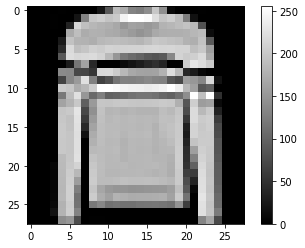

In [117]:
plt.figure()
plt.imshow(train_images[5], cmap = cm.gray)
plt.colorbar()
plt.grid(False)
plt.show()

In [118]:
# 데이터 전처리
train_images = train_images / 255.0

test_images = test_images / 255.0

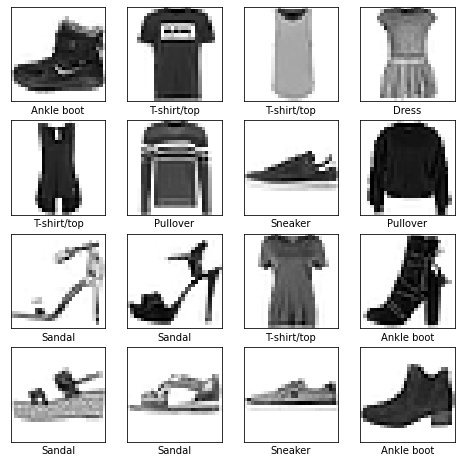

In [119]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [120]:
# 모델 설계
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(140, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4917 - accuracy: 0.8270
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3648 - accuracy: 0.8690
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3253 - accuracy: 0.8816
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3030 - accuracy: 0.8890
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2859 - accuracy: 0.8940
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.8991
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2615 - accuracy: 0.9030
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2504 - accuracy: 0.9065
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2421 - accuracy: 0.9103
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.233

In [122]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3432 - accuracy: 0.8884 - 480ms/epoch - 2ms/step

Test accuracy: 0.8884000182151794


In [123]:
# 예측
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 0s 1ms/step


array([2.1730761e-08, 6.2840660e-10, 4.4457758e-12, 4.7070059e-10,
       3.0927374e-12, 1.5674715e-03, 1.9287343e-08, 5.8662160e-03,
       4.0782425e-08, 9.9256623e-01], dtype=float32)

In [124]:
np.argmax(predictions[0])

9

In [125]:
test_labels[0]

9

In [130]:
# 예측 확인
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

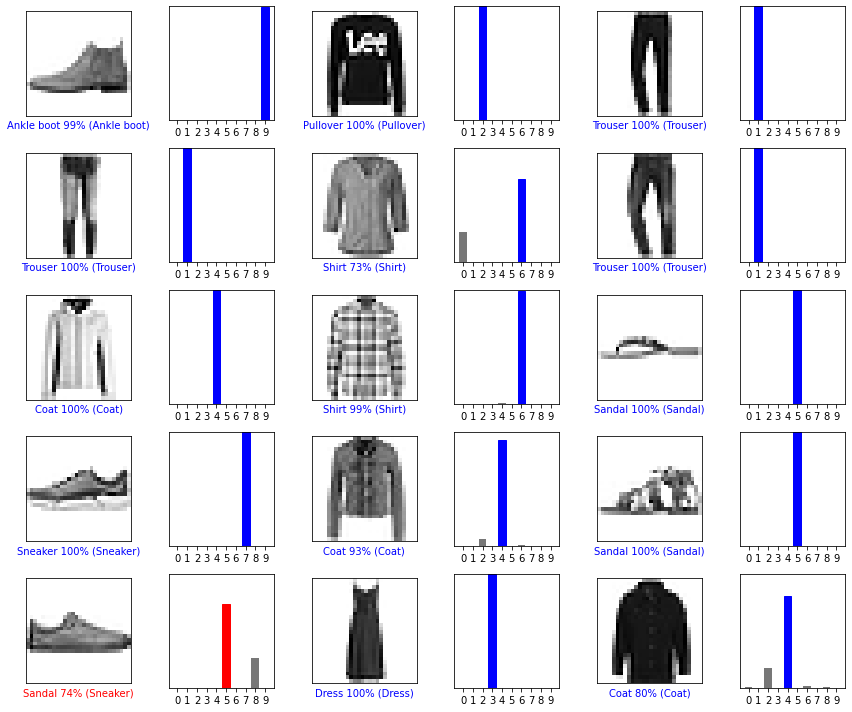

In [131]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 16ms/step


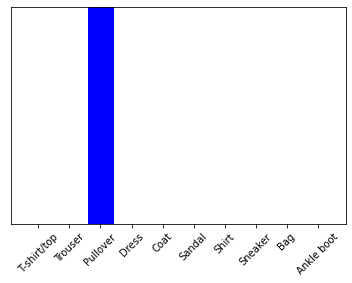

In [132]:
# 모델 이용
img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [133]:
np.argmax(predictions_single[0])

2

In [129]:
# end of file